# Assignment 4 - Predictive Analysis (Simple Linear Regression)


#### **Developer:** Mark Trombly
#### **Course:** Artifical Intelligence Applications
#### **Program Requirements**

1. Contrast similarities/differences among AI vs. Machine-Learning vs. Deep-Learning
2. Identify correlations
3. Use Seaborn (data visualization library built on top of matplotlib)
4. Graph correlations
5. Use *simple* linear regression
6. Create linear model
7. Plot regression line
8. Make predictions - using simple linear regression model
9. Plot residuals

# Regression Analysis

# What is regression analysis?

1. Equation predicts **"unknown values"** (i.e., *dependent variables*) based upon one or more **known values** (i.e., *independent variable(s))*.
2. **Dependent variables (also called):** *response, outcome/output, or target* variables (respond to changes in (an)other variable(s))
3. **Independent variables (also called):** *predictor, input, regressor, or explanatory* variable(s) (predict/explain changed values of dependent variable(s))
4. **Goal:** Find the best fitting line which can accurately predict the output.

*Dependent* variables (**output on y-axis**) are *always* the ones *being studied*--that is, whose variation(s) is/are being modified somehow!

*Independent* variables (**input on x-axis**) are *always* the ones being manipulated, to study and compare the effects on the dependent variable(s).

**Note:** The designations *independent* and *dependent* variables are used to not imply "cause and effect" (as do "predictor" or "explanatory" terms).

**Note:** Based on the number of input and output variables, linear regression has three types:
1. Simple linear regression (1 DV/1 IV)
2. Multiple linear regression (1 DV/2 or more IVs)
3. Multivariate linear regression (2 or more DVs/2 or more IVs)
   
**Simple linear regression:** Only **one** *independent* variable affecting **one** *dependent* variable.

**Multiple linear regression: Two or more** *independent* variables affecting **one** *dependent* variable.

**Multivariate linear regression: Two or more** *independent* variables affecting **two or more** *dependent* variables.

# Independent Variables vs. Dependent Variables


### **Independent Variables (predictors):**
- Can the variable(s) be maniplated or controlled?
- Do(es) the variable(s) come before the other variable(s) chronologically?
- Is/are the variables being used to see the affects on (an)other variable(s)?
### **Dependent variables (outcomes):**
- Is/are the variable(s) being used as (a) measured outcome(s)?
- Do(es) the variable(s) depend upon an(other) variable(s)?
- Is/are this/these variable(s) measured after (an)other variable(s) is/are modified?

# Supervised vs. Unsupervised Learning
- Supervised learning: prior knowledge of what output values for samples should be.
- Unsupervised learning, does not have labeled outputs. Goal is to infer natural structure present within a set of data points.
  
**References:** https://www.ibm.com/cloud/blog/supervised-vs-unsupervised-learning

  https://www.seldon.io/supervised-vs-unsupervised-learning-explained

In [1]:
#1. import pandas and numpy libraries to perform mathematical functions
import sys
import os
import numpy as np
import pandas as pd
print(sys.version) # print python version
print(os.environ['CONDA_DEFAULT_ENV']) # print conda environment

# Note: The following code *can* be used to suppress warnings (though, best just to fix them!).
# import warnings
# warnings.filterwarnings('ignore')

3.9.21 (main, Dec 11 2024, 16:35:24) [MSC v.1929 64 bit (AMD64)]
testenv


# Get data - read cleaned .csv file

In [2]:
# 2. assign cleaned .csv file to "advertising_data" variable
# Read given CSV file, and view some sample records

# ***Note:*** ads in thousand $$$, Sales in million $$$
advertising_data = pd.read_csv("my_company_data.csv")

# display first and last 5 records
advertising_data

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5


# Analyze dataset

In [3]:
# 3. print number of rows and columns
advertising_data.shape

(200, 4)

In [4]:
# 4. print dataframe info (Note: also, indicates null values, which, if present, would need to be remedied.)
advertising_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
# 5. print dataframe statistics summary
advertising_data.describe()

# format entire dataframe to two decimal places
pd.options.display.float_format = "{:,.2f}".format

print(advertising_data.describe())

          TV  Radio  Newspaper  Sales
count 200.00 200.00     200.00 200.00
mean  147.04  23.26      30.55  15.13
std    85.85  14.85      21.78   5.28
min     0.70   0.00       0.30   1.60
25%    74.38   9.97      12.75  11.00
50%   149.75  22.90      25.75  16.00
75%   218.82  36.52      45.10  19.05
max   296.40  49.60     114.00  27.00


In [6]:
# 6. Display pairwise correlations of *all* columns in dataframe.
advertising_data.corr().head()

# Note: "Perfect" correlations (1.0) with same attributes (e.g., "TV" and "TV").
# Note: High correlation between "TV" (ads) and "Sales"--much less for "Radio"!

,TV,Radio,Newspaper,Sales
TV,1.00,0.05,0.06,0.90
Radio,0.05,1.00,0.35,0.35
Newspaper,0.06,0.35,1.00,0.16
Sales,0.90,0.35,0.16,1.00


In [7]:
# 7. import matplotlib and seaborn libraries to visualize data
# Note: Seaborn provides more visualization patterns, with less syntax than matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

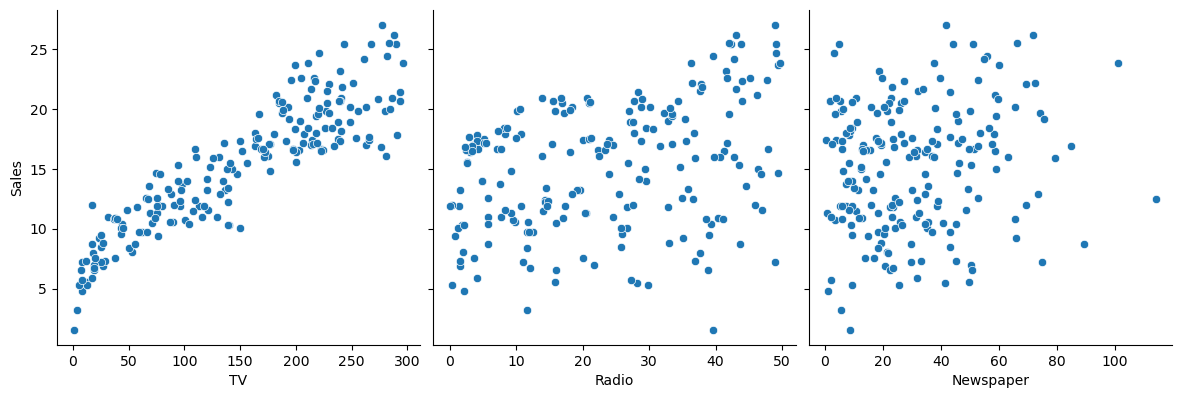

In [8]:
# 8. visualize data for correlations using pairplot(). y=DV(s), x=IV(s)
# pairplot(): Plot pairwise relationships in dataset.
# https://seaborn.pydata.org/generated/seaborn.pairplot.html
# Note: scatter plot good when comparing two numeric vaiables, like here!
sns.pairplot(advertising_data, x_vars=['TV', 'Radio', 'Newspaper'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

In [9]:
# 9. Display one attribute's correlation ("Sales") to *all* other columns in dataframe, sorted in descending order by Sales.
advertising_data.corr()[['Sales']].sort_values(by='Sales', ascending=False)

,Sales
Sales,1.00
TV,0.90
Radio,0.35
Newspaper,0.16


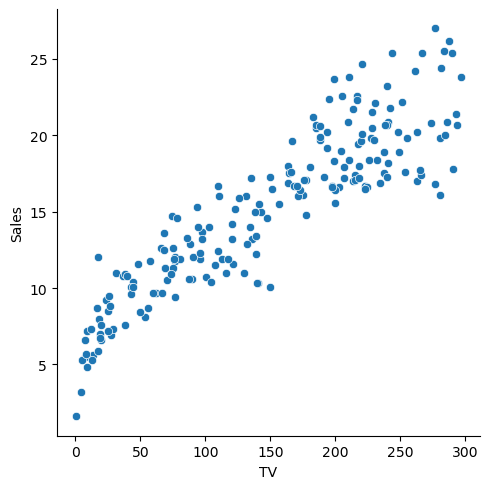

In [10]:
# 10. Focus on correlation between "TV" (ads) and "Sales."
sns.relplot(data=advertising_data, x='TV', y='Sales')

# Note: Seaborn relational plot (relplot) visualises how variables relate to each other within a dataset.
# Note: When looking for correlations, see if a line can be drawn through as many datapoints as possible.

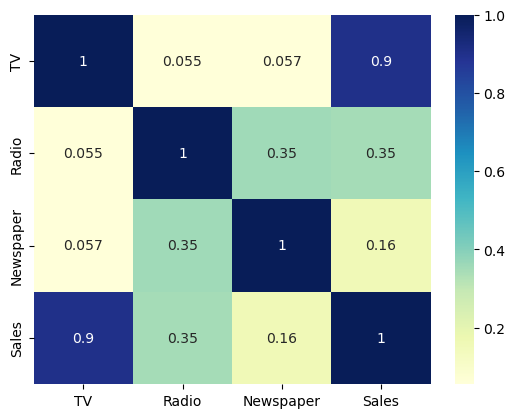

In [11]:
# 11. Visually display correlations using Seaborn's heatmap() function.
# https://seaborn.pydata.org/generated/seaborn.heatmap.html
sns.heatmap(advertising_data.corr(), cmap="YlGnBu", annot = True)
plt.show()

# Note: "annot" property set to "True" so that r-values are displayed in each cell.
# Here, display color bar. To trun off: cbar=False (default True).

<Axes: >

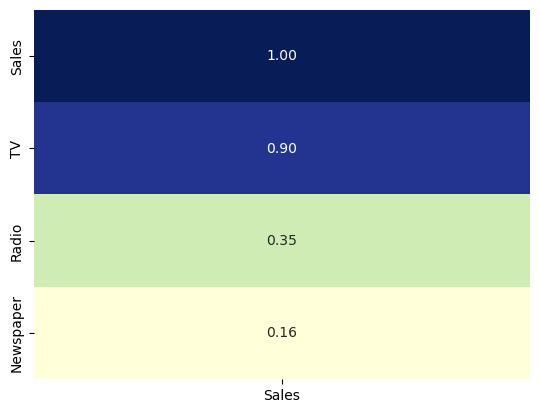

In [12]:
# 12. Visually condense correlation of one variable to other variables.
sns.heatmap(data=advertising_data.corr()[['Sales']].sort_values(by='Sales', ascending=False), annot=True, cmap='YlGnBu', cbar=False, fmt=f'.2f')

# Note: "annot" property set to "True" so that r-values are displayed in each cell.
# Here, hide the color bar here (cbar=False), as it is self-explanatory.
# vmin and vmax parameters define data range that colormap covers
# Also note, no vmin/vmax properties used--which automatically determines min/max values from data (also, provides greater color contrast).
# Simply, if either wmin/vmax *not* provided, they default to minimum/maximum input values, respectively.

# Simple Linear Regression Steps
1. Identify x (IV) and y (DV): x=TV, y=Sales
2. Create Train and Test datasets
3. Train model
4. Evaluate model

In [13]:
# 13. Identify x (IV) and y (DV)
x = advertising_data['TV']
y = advertising_data['Sales']

In [14]:
# 14. Create train and test datasets
# a. split variables into training and testing sets
# b. build model using training set, then run model on testing set

# Note: Training dataset used to *fit* the model, and test dataset is used to *evaluate* the model.
# Training data is the biggest subset of *original* dataset--used to train or fit the model.
# Test dataset is another subset of *original* data, independent of training dataset--validates model's accuracy.
# https://www.javatpoint.com/train-and-test-datasets-in-machine-learning

# split variables into train and test datasets into 7:3 ration, respectively, by importing train_test_split
# Translation: 70% of observations for training, and remaining 30% for testing
# train-test_split()
# https://realpython.com/train-test-split-python-data/

# random_state: controls randomization during splitting (default value None).
# random_state value not important--can be any non-negative integer.
# Generally, *only* used to make tests reproductible--provides fixed seed value.
# https://numpy.org/doc/stable/reference/random/legacy.html#numpy.random.RandomState
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 100)

# Note: To date, there's no clear cut agreement on data split ratios, only common practices.
# https://onlinelibrary.wiley.com/doi/10.1002/sam.11583
# https://www.baeldung.com/cs/train-test-datasets-ratio

# Review train datasets after splitting

In [15]:
# 15. Display x training dataset (IVs)
x_train

74    213.40
3     151.50
185   205.00
26    142.90
90    134.30
       ...  
87    110.70
103   187.90
67    139.30
24     62.30
8       8.60
Name: TV, Length: 140, dtype: float64

In [16]:
# 16. Display y training dataset
y_train

74    17.00
3     16.50
185   22.60
26    15.00
90    14.00
       ... 
87    16.00
103   19.70
67    13.40
24     9.70
8      4.80
Name: Sales, Length: 140, dtype: float64

**Add column to perform regression fit properly for simple linear regression:**

In [17]:
# 17. Display shape for x train and test datasets, *before* adding column
print(x_train.shape)
print(x_test.shape)

# Note: Array "shape" is number of elements in each dimension. (Here, 1 dimension array.)

(140,)
(60,)


# Prepare Model

In [18]:
# 18. add additional column to train and test datasets
# By "reshaping" we can add or remove dimensions (i.e., change array "shape.")
# https://www.w3schools.com/python/numpy/numpy_array_reshape.asp

# reshape() concept: First, raveling array (using given index order),
# then inserting/deleting elements from raveled array into new array, using same index order for raveling.
# https://numpy.org/doc/stable/reference/generated/numpy.reshape.html

# Here, reshape From 1-D to 2-D
x_train = x_train.values.reshape(-1,1)
x_test = x_test.values.reshape(-1,1)

# 19. display shape for x train and test data, *after* adding column (Now, 2 dimension array.)
print(x_train.shape)
print(x_test.shape)

(140, 1)
(60, 1)


# Fitting model: Find best fitting line -- to accurately predict output

In [19]:
# 20. fit regression line to plot
from sklearn.linear_model import LinearRegression

# Note: Can create linear regression model object (instantiation) and fit in two steps, or at the same time
# 1. Instantiate linear regression model object
# Lm = LinearRegression()

# 2. fit model using fit() method
# Lm.fit(x_train, y_train)

# Or...both at same time...
lm = LinearRegression().fit(x_train, y_train)

# Note: fit() method accepts training datset and fits regression line to dataset.

# Intercept and Slope - Why?

In [20]:
# print model coefficients

# 21. print intercept value (aka the "constant"): Represents mean value of DV when all of IV(s) to model are equal to zero.
# Note: Also known as "y intercept." Simply, the value at which the fitted line (aka "regression line") crosses the y-axes.
# https://www.statology.org/intercept-in-regression/

print("Intercept:", lm.intercept_)

# 22. print slope value: Indicates how much DV expected to change, as IV(s) increase(s)/decrease(s).
# https://www.dummies.com/article/academics-the-arts/math/statistics/how-to-interpret-a-regression-line-169717/

print("Slope:", lm.coef_)

# Additionaly:
# intercept (aka "y-intercept"): where line of best fit intersects y-axis. Represents initial condtion/starting point of data.
# slope: represents change in y for any 1 unit chane in x.
# https://study.com/learn/lesson/slope-intercept-linear-model-overview-interpretation-examples.html

Intercept: 6.9486832000013585
Slope: [0.05454575]


In [21]:
# 23. simple linear regression formula from above values
# Y = mX + b
# Y = DV, X = IV, m = estimated slope, b = estimated intercept

# Note: parentheses not needed. (TV = TV ad $$$ spent.)
# Sales = (0.054 * TV) + 6.948

# r2 values - how well regression line approximates actual data
- R2 also known as Coefficient of Determination.
- R2 determines how good a linear fit exists between predictors and target variable.
- Returns values between 0 and 1 (inclusive)--higher the value, better the model!

In [22]:
# 24. predict y_value
y_train_predict = lm.predict(x_train)
y_test_predict = lm.predict(x_test)

from sklearn.metrics import r2_score

# 25. print and compare r2 values of both train and test data
# print("r2 training score: ", r2_score(y_train,y_train_predict))
# print("r2 testing score: ", r2_score(y_test,y_test_predict))

# Or, formatted...
print("{0:s} {1:.2f}".format("r2 training score: ", r2_score(y_train,y_train_predict)))
print("{0:s} {1:.2f}".format("r2 testing score: ", r2_score(y_test,y_test_predict)))

# Note: (r2): Statistical measure of how well regression line approximates actual data
# Represents the proportion of variance for a DV that's explained by IV(s) in a regression model.
# https://www.rasgoml.com/feature-engineering-tutorials/how-to-calculater-r-2-with-scikit-learn
# https://towardsdatascience.com/simple-linear-regression-model-using-python-machine-learning-eab7924d18b4

# Bottom-line: r2 values on test data within 5% of r2 values on training data. Model looks good!

r2 training score:  0.82
r2 testing score:  0.79


# Plot linear regression (using simple estimation)

<Axes: xlabel='TV', ylabel='Sales'>

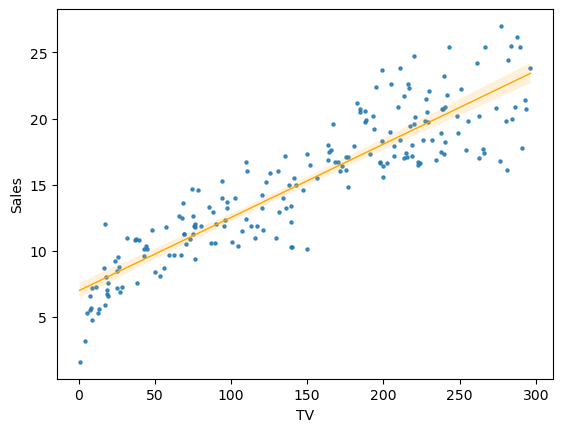

In [23]:
# 26. Plot data and linear regression model fit.
# Note: Goal of seaborn is to help find and emphasize patterns through quick and easy visualizations.
# There are *MANY* was to find relationships and determine patterns. Provided here are *some* ways of doing so.
# regplot(): https://seaborn.pydata.org/generated/seaborn.regplot.html

# Note: Seaborn is not itself a package for statistical analysis--for that, use scikit-learn, or statsmodel.
# https://seaborn.pydata.org/tutorial/regression.html#regressoin-tutorial

# Note: Regression lines indicate a linear relationship between DV(s) on y-axis and IV(s) on x-axis.
sns.regplot(data=advertising_data, x='TV', y='Sales', ci=95, scatter_kws={'s':5}, line_kws={"lw":1, 'color':'orange'})

# scatter_kws changes dot size (avoids overplotting and/or aesthetics). Line_kws changes line color and width
# https://stackoverflow.com/questions/53257382/what-do-scatter-kws-and-line-kws-do-in-seaborn-lmplot
# https://eeob-biodata.github.io/BCB546X-python/05-seaborn-viz/

# ci (confidence interval used for regression estimate--None recommended)
# https://seaborn.pydata.org/generated/seaborn.lmplot.html

# *However*, here, confidence interval of 95% used for demo purposes.
# Note: Size of confidence interval for regression estimate--will be drawn using translucent bands around regression line.

# Confidence interval: a range around a measuremnet that indicates the measurement's precision.

# Plot residuals using Seaborn

<Axes: xlabel='TV', ylabel='Sales'>

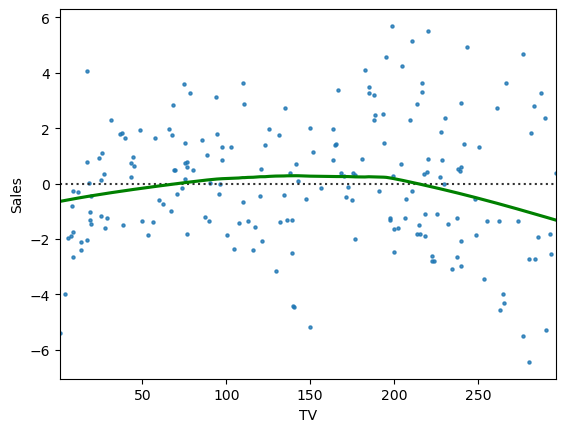

In [24]:
# 27. Residual plot: used to plot residual values after plotting linear regression model.
# What is a residual plot? Helps to identify regression model fit.
# Note: "Residuals" are simply differences between DV test values and DV predicted values.
# Horizontal line indicates where predicted and actual values are the same.

# Note: Dots above line indicate underestimating--that is, predicted sales too low for TV ads.
# https://datagy.io/seaborn-residplot/

# Lowess (aka "LOESS") line stands for "Locally estimated scatterplot smoothing, or LOESS."
# Creates smooth line to help better understand relationship between variables and trends.
# Essentially, fits line to scatter plot (or time plot) to more easily see a line of best fit.
# https://www.statisticshowto.com/Lowess-smoothing/

# Interpretation: Between ~$75k and ~$215k will generate the most sales in proportion to TV ad $$$ spent.

# Note: scatter_kws and line_kws used for optional keyword args. ("kws" = keywords)
# Here, line_kws: color of lowess line
sns.residplot(data=advertising_data, x='TV', y='Sales', scatter_kws={'s':5}, lowess=True, line_kws={'color':'green'})

# ***ABOVE ALL***: *Be sure* to do your *OWN* research, as well as play with the code and values provided to gain further insights!

In [25]:
pd.date_range('01/01/2020', '12/31/2020', freq='QE')

DatetimeIndex(['2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31'], dtype='datetime64[ns]', freq='QE-DEC')

In [26]:
pd.date_range('01/01/2020', '12/31/2020', freq='Q')

C:\Users\micro\AppData\Local\Temp\ipykernel_21268\667364720.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  pd.date_range('01/01/2020', '12/31/2020', freq='Q')


DatetimeIndex(['2020-03-31', '2020-06-30', '2020-09-30', '2020-12-31'], dtype='datetime64[ns]', freq='QE-DEC')

In [27]:
pd.daterange('01/01/2020', '12/31/2020', freq='QS')

AttributeError: module 'pandas' has no attribute 'daterange'

In [ ]:
pd.reindex('01/01/2020', '12/31/2020', freq='Q')